<div style="text-align: center; background-color: black;">
  <span style="font-size: 50px; color: white; font-weight: bold;">Social Media Sentiments Analysis</span>
</div>

<img src="https://storage.googleapis.com/kaggle-datasets-images/4245661/7316345/e6d20ba8f620d0f86db1715f2de3f540/dataset-card.png?t=2024-01-01-07-10-21" alt="Dataset Card" style="height: 300px; display: block; margin-left: auto; margin-right: auto;">


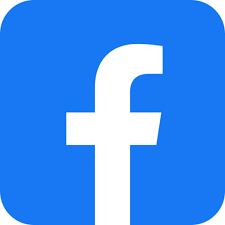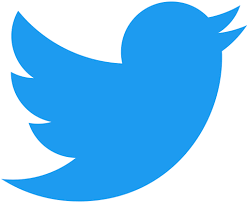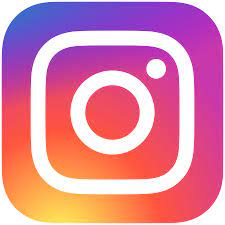

# Introduction
### In today's digital age, social media has become an integral part of our lives, influencing our opinions, behaviors, and interactions. Understanding the sentiments expressed on these platforms can provide valuable insights into public opinion, brand perception, and user engagement. This project focuses on analyzing sentiments from three major social media platforms: Twitter, Facebook, and Instagram. The goal is to clean and organize the data, perform exploratory data analysis (EDA), and derive meaningful insights from the user interactions and sentiments expressed on these platforms.

### Goal of the Project: In this project, we aim to develop a Social Media Sentiment Analysis system to assist organizations, including platforms like Facebook and Twitter. The objective is to understand and analyze user sentiments, enabling the organization to better serve users by providing the information or objects they are searching for.

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [5]:
df = pd.read_csv("sentimentdataset.csv")

In [6]:
df

,Unnamed: 0.1,Unnamed: 0,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
0,0,0,Enjoying a beautiful day at the park! ...,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12
1,1,1,Traffic was terrible this morning. ...,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8
2,2,2,Just finished an amazing workout! 💪 ...,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15,15
3,3,3,Excited about the upcoming weekend getaway! ...,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,1,15,18
4,4,4,Trying out a new recipe for dinner tonight. ...,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,2023,1,15,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
727,728,732,Collaborating on a science project that receiv...,Happy,2017-08-18 18:20:00,ScienceProjectSuccessHighSchool,Facebook,#ScienceFairWinner #HighSchoolScience,20.0,39.0,UK,2017,8,18,18
728,729,733,Attending a surprise birthday party organized ...,Happy,2018-06-22 14:15:00,BirthdayPartyJoyHighSchool,Instagram,#SurpriseCelebration #HighSchoolFriendship,25.0,48.0,USA,2018,6,22,14
729,730,734,Successfully fundraising for a school charity ...,Happy,2019-04-05 17:30:00,CharityFundraisingTriumphHighSchool,Twitter,#CommunityGiving #HighSchoolPhilanthropy,22.0,42.0,Canada,2019,4,5,17
730,731,735,"Participating in a multicultural festival, cel...",Happy,2020-02-29 20:45:00,MulticulturalFestivalJoyHighSchool,Facebook,#CulturalCelebration #HighSchoolUnity,21.0,43.0,UK,2020,2,29,20


In [13]:
df.shape

(732, 15)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0.1  732 non-null    int64  
 1   Unnamed: 0    732 non-null    int64  
 2   Text          732 non-null    object 
 3   Sentiment     732 non-null    object 
 4   Timestamp     732 non-null    object 
 5   User          732 non-null    object 
 6   Platform      732 non-null    object 
 7   Hashtags      732 non-null    object 
 8   Retweets      732 non-null    float64
 9   Likes         732 non-null    float64
 10  Country       732 non-null    object 
 11  Year          732 non-null    int64  
 12  Month         732 non-null    int64  
 13  Day           732 non-null    int64  
 14  Hour          732 non-null    int64  
dtypes: float64(2), int64(6), object(7)
memory usage: 85.9+ KB


# Data Cleaning

In [16]:
df.drop(columns = "Unnamed: 0.1",inplace = True)

In [19]:
df.rename(columns = {"Unnamed: 0" : "ID"}, inplace = True)

In [20]:
df.columns

Index(['ID', 'Text', 'Sentiment', 'Timestamp', 'User', 'Platform', 'Hashtags',
       'Retweets', 'Likes', 'Country', 'Year', 'Month', 'Day', 'Hour'],
      dtype='object')

In [22]:
df.isnull().sum()

ID           0
Text         0
Sentiment    0
Timestamp    0
User         0
Platform     0
Hashtags     0
Retweets     0
Likes        0
Country      0
Year         0
Month        0
Day          0
Hour         0
dtype: int64

In [23]:
df.duplicated().sum()

0

In [24]:
df.dtypes

ID             int64
Text          object
Sentiment     object
Timestamp     object
User          object
Platform      object
Hashtags      object
Retweets     float64
Likes        float64
Country       object
Year           int64
Month          int64
Day            int64
Hour           int64
dtype: object

In [28]:
df["Timestamp"] = pd.to_datetime(df["Timestamp"])
df["Day"] = df.Timestamp.dt.day
df["Month"] = df.Timestamp.dt.month
df["Year"] = df.Timestamp.dt.year
df["Hour"] = df.Timestamp.dt.hour

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   ID         732 non-null    int64         
 1   Text       732 non-null    object        
 2   Sentiment  732 non-null    object        
 3   Timestamp  732 non-null    datetime64[ns]
 4   User       732 non-null    object        
 5   Platform   732 non-null    object        
 6   Hashtags   732 non-null    object        
 7   Retweets   732 non-null    float64       
 8   Likes      732 non-null    float64       
 9   Country    732 non-null    object        
 10  Year       732 non-null    int32         
 11  Month      732 non-null    int32         
 12  Day        732 non-null    int32         
 13  Hour       732 non-null    int32         
dtypes: datetime64[ns](1), float64(2), int32(4), int64(1), object(6)
memory usage: 68.8+ KB


In [30]:
df['Text']= df['Text'].str.strip()
df['Sentiment']= df['Sentiment'].str.strip()
df['User']= df['User'].str.strip()
df['Platform']= df['Platform'].str.strip()
df['Hashtags']= df['Hashtags'].str.strip()
df['Country']= df['Country'].str.strip()

# EDA Exploratory Data Analysis

In [31]:
df.head(1)

,ID,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
0,0,Enjoying a beautiful day at the park!,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12


In [34]:
df["Sentiment"].value_counts().nlargest(10)

Sentiment
Positive       45
Joy            44
Excitement     37
Contentment    19
Neutral        18
Gratitude      18
Curiosity      16
Serenity       15
Happy          14
Nostalgia      11
Name: count, dtype: int64

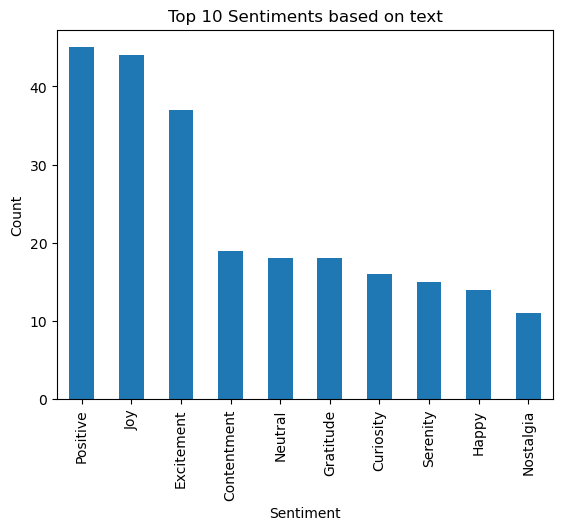

In [37]:
df["Sentiment"].value_counts().nlargest(10).plot(kind = "bar")
plt.title("Top 10 Sentiments based on text")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()

In [39]:
df["Platform"].value_counts()

Platform
Instagram    258
Twitter      243
Facebook     231
Name: count, dtype: int64

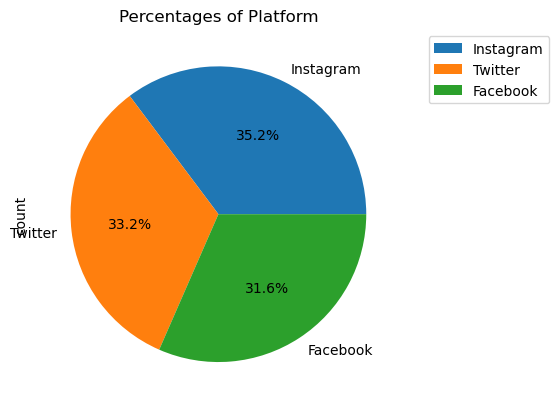

In [44]:
df["Platform"].value_counts().plot(kind = "pie", autopct = "%1.1f%%")
plt.title("Percentages of Platform")
plt.legend(bbox_to_anchor=(1.05, 1))
plt.show()

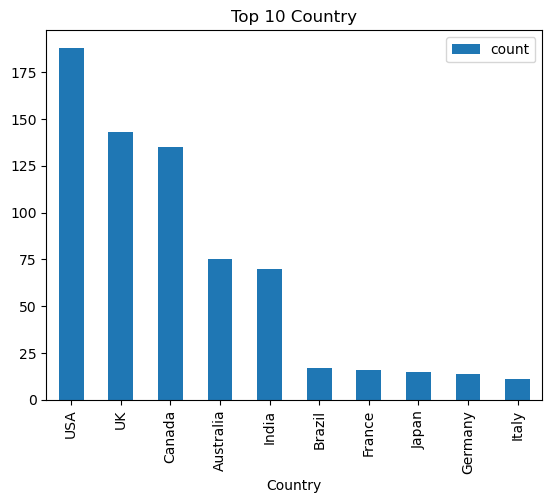

In [48]:
df["Country"].value_counts().nlargest(10).plot(kind ="bar")
plt.title('Top 10 Country')
plt.legend()
plt.show()

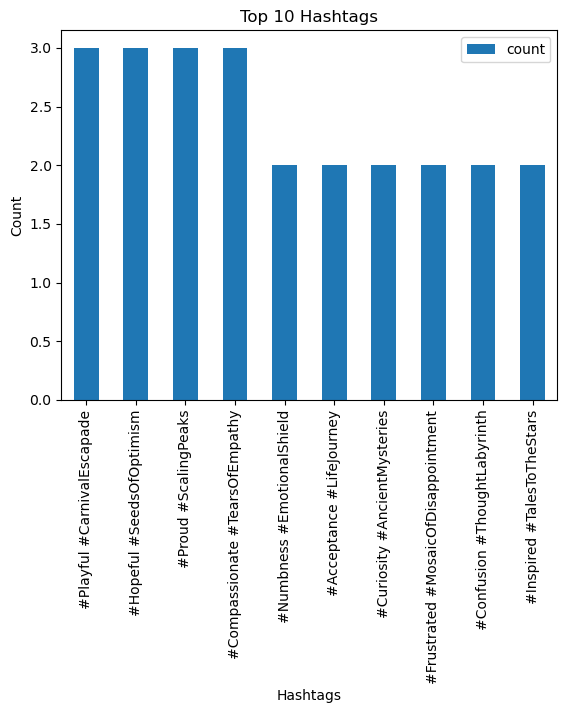

In [51]:
df["Hashtags"].value_counts().nlargest(10).plot(kind="bar")
plt.title('Top 10 Hashtags')
plt.xlabel('Hashtags')
plt.ylabel('Count')
plt.legend()
plt.show()

In [53]:
df.describe()

,ID,Timestamp,Retweets,Likes,Year,Month,Day,Hour
count,732.000000,732,732.000000,732.000000,732.000000,732.000000,732.000000,732.000000
mean,369.740437,2020-12-08 21:37:38.196721408,21.508197,42.901639,2020.471311,6.122951,15.497268,15.521858
min,0.000000,2010-05-15 15:30:00,5.000000,10.000000,2010.000000,1.000000,1.000000,0.000000
25%,185.750000,2019-03-08 17:27:30,17.750000,34.750000,2019.000000,3.000000,9.000000,13.000000
50%,370.500000,2021-09-20 14:30:00,22.000000,43.000000,2021.000000,6.000000,15.000000,16.000000
75%,553.250000,2023-02-26 11:48:45,25.000000,50.000000,2023.000000,9.000000,22.000000,19.000000
max,736.000000,2023-10-22 20:45:00,40.000000,80.000000,2023.000000,12.000000,31.000000,23.000000
std,212.428936,NaN,7.061286,14.089848,2.802285,3.411763,8.474553,4.113414


In [54]:
num_columns = df[["Retweets", "Likes", "Year", "Month", "Day"]]

for col in num_columns.columns:
    print(f"Minimum {col}: {df[col].min()} | Maximum {col}: {df[col].max()}")
    

Minimum Retweets: 5.0 | Maximum Retweets: 40.0
Minimum Likes: 10.0 | Maximum Likes: 80.0
Minimum Year: 2010 | Maximum Year: 2023
Minimum Month: 1 | Maximum Month: 12
Minimum Day: 1 | Maximum Day: 31


## Bi-Variate Analysis

### Top 10 hashtags retweeted

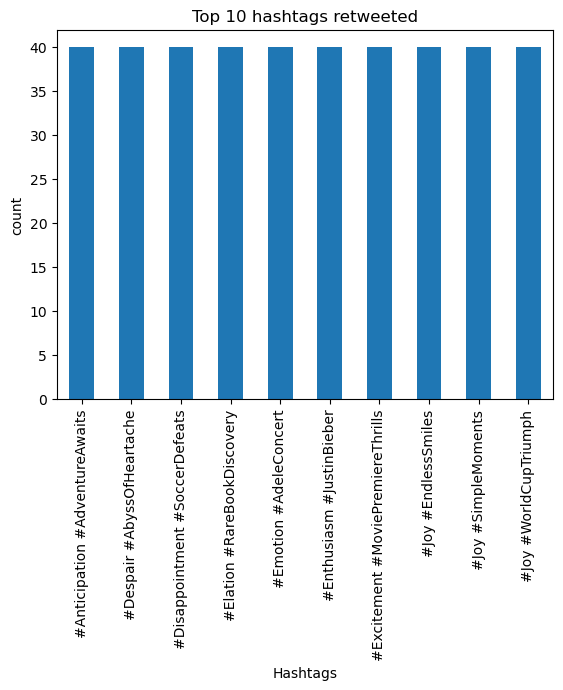

In [59]:
df.groupby("Hashtags")["Retweets"].max().nlargest(10).plot(kind = "bar")
plt.title('Top 10 hashtags retweeted')
plt.xlabel('Hashtags')
plt.ylabel('count')
plt.show()

### Which platform is most liked by users?

<Axes: xlabel='Platform', ylabel='count'>

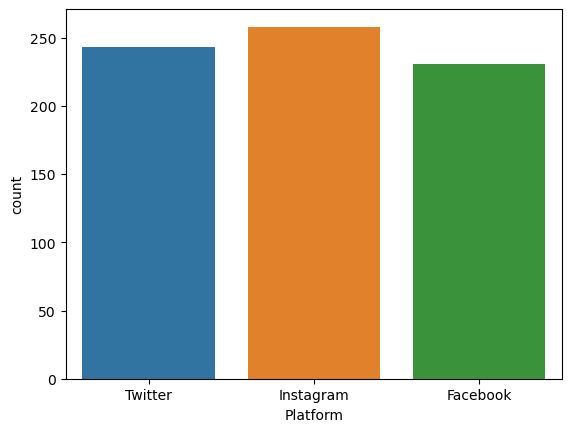

In [60]:
sns.countplot(x= "Platform", data=df)

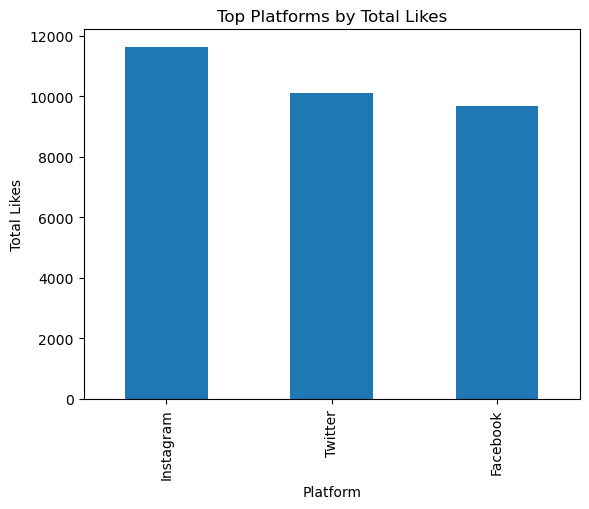

In [64]:
df.groupby("Platform")["Likes"].sum().nlargest(10).plot(kind = "bar")
plt.title('Top Platforms by Total Likes')
plt.xlabel('Platform')
plt.ylabel('Total Likes')
plt.show()

### Count of Total Likes based on Counties

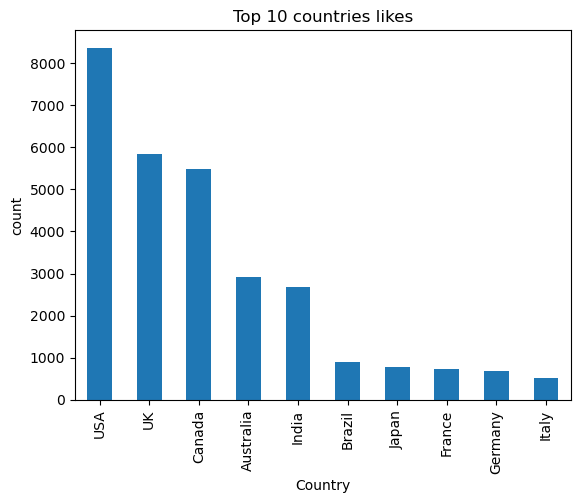

In [71]:
df.groupby("Country")["Likes"].sum().nlargest(10).plot(kind = "bar")
plt.title('Top 10 countries likes')
plt.xlabel('Country')
plt.ylabel('count')
plt.show()

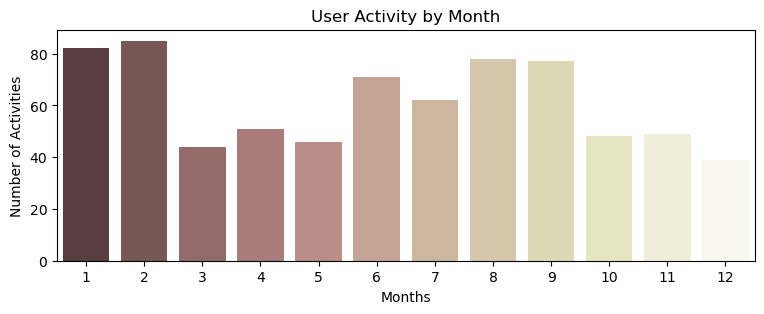

In [125]:
activity_by_month = df.groupby("Month").size().reset_index(name='Activity')

# Plot
plt.figure(figsize=(9, 3))
sns.barplot(data=activity_by_month, x="Month", y="Activity", palette="pink")

plt.title("User Activity by Month")
plt.xlabel("Months")
plt.ylabel("Number of Activities")
plt.xticks(range(0, 12)) 

plt.show()

## EDA on Each Application  

In [76]:
Instagram=df[df['Platform']=='Instagram']
Facebook=df[df['Platform']=='Facebook']
Twitter=df[df['Platform']=='Twitter']

# Instagram

### Top 10 Hashtags on Instagram

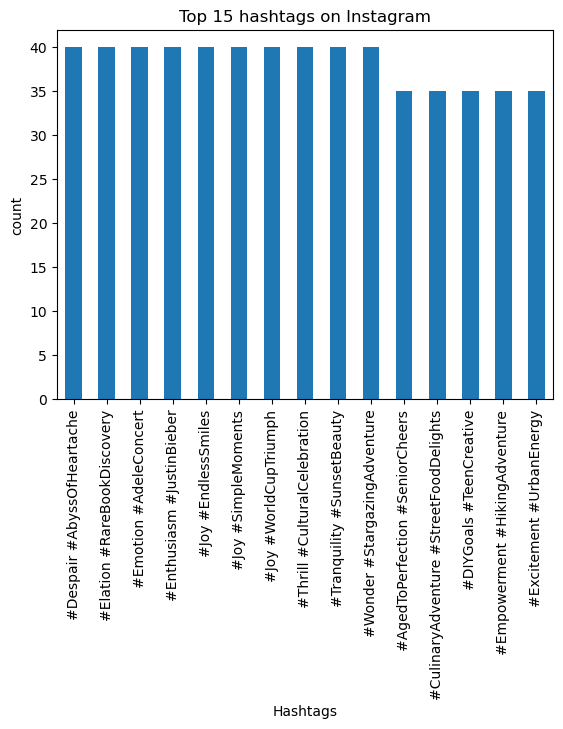

In [87]:
Instagram.groupby('Hashtags')['Retweets'].max().nlargest(15).sort_values(ascending=False).plot(kind='bar')
plt.title('Top 15 hashtags on Instagram')
plt.xlabel('Hashtags')
plt.ylabel('count')
plt.show()

### Top Instagram Accounts liked by the User 

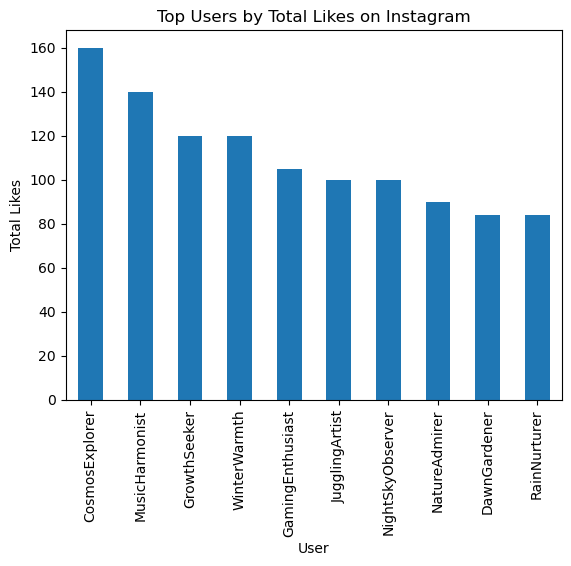

In [98]:
Instagram.groupby("User")["Likes"].sum().nlargest(10).plot(kind = "bar")
plt.title('Top Users by Total Likes on Instagram')
plt.xlabel('User')
plt.ylabel('Total Likes')
plt.show()

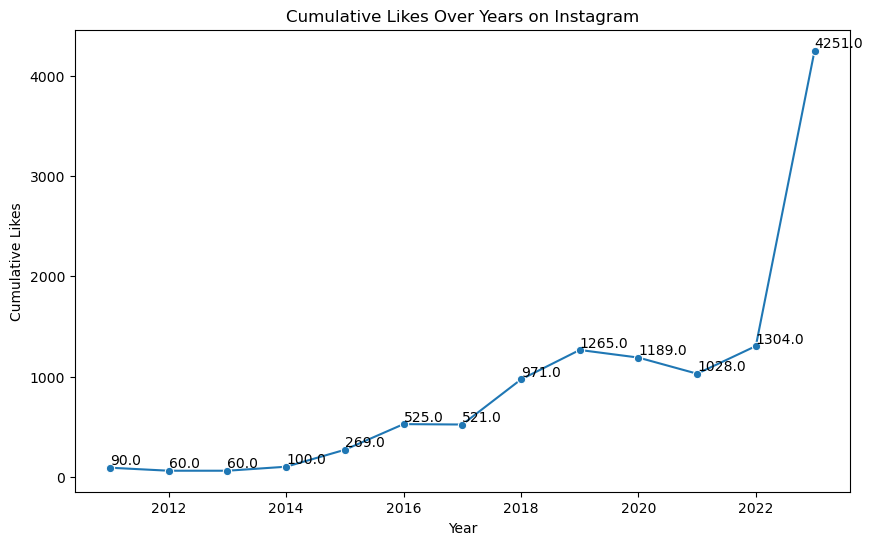

In [101]:
insta = Instagram.groupby("Year")["Likes"].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(data=insta, x="Year", y="Likes", marker="o")

for index, value in insta.iterrows():
    plt.text(value["Year"], value["Likes"], str(value["Likes"]), ha="left", va="bottom")

plt.title("Cumulative Likes Over Years on Instagram")
plt.xlabel("Year")
plt.ylabel("Cumulative Likes")

plt.show()

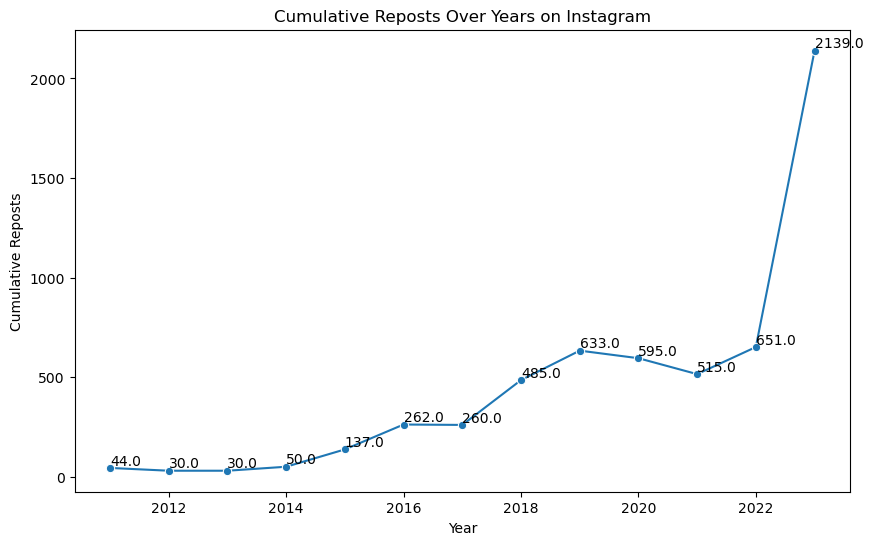

In [104]:
f = Instagram.groupby('Year')['Retweets'].sum().reset_index()
plt.figure(figsize=(10, 6))
sns.lineplot(data=f, x='Year', y='Retweets', marker='o')
for index, value in f.iterrows():
    plt.text(value['Year'], value['Retweets'], str(value['Retweets']), ha='left', va='bottom')

plt.title('Cumulative Reposts Over Years on Instagram')
plt.xlabel('Year')
plt.ylabel('Cumulative Reposts')

plt.show()

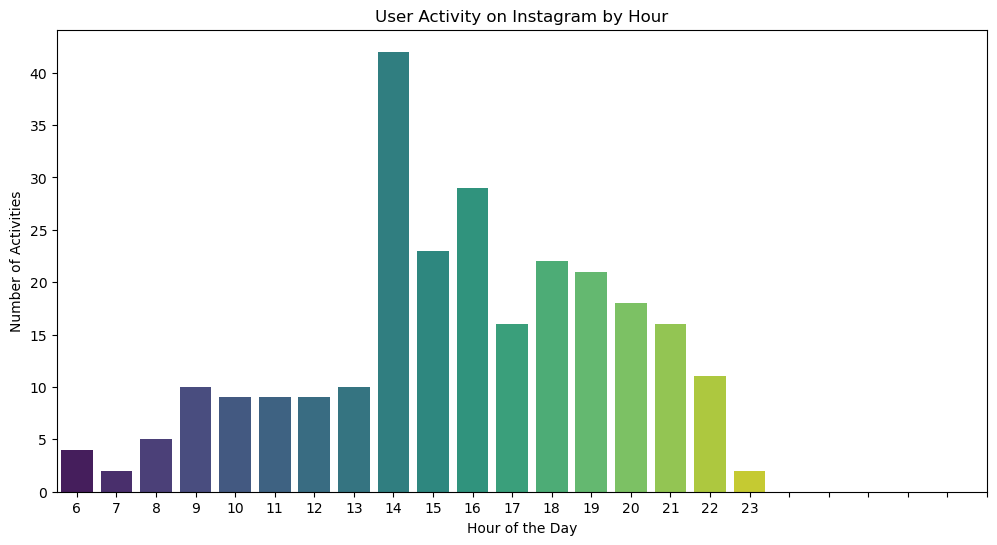

In [116]:
activity_by_hour = Instagram.groupby("Hour").size().reset_index(name='Activity')

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=activity_by_hour, x="Hour", y="Activity", palette="viridis")

plt.title("User Activity on Instagram by Hour")
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Activities")
plt.xticks(range(0, 24)) 

plt.show()

## Facebook

### Top 10 Hashtags

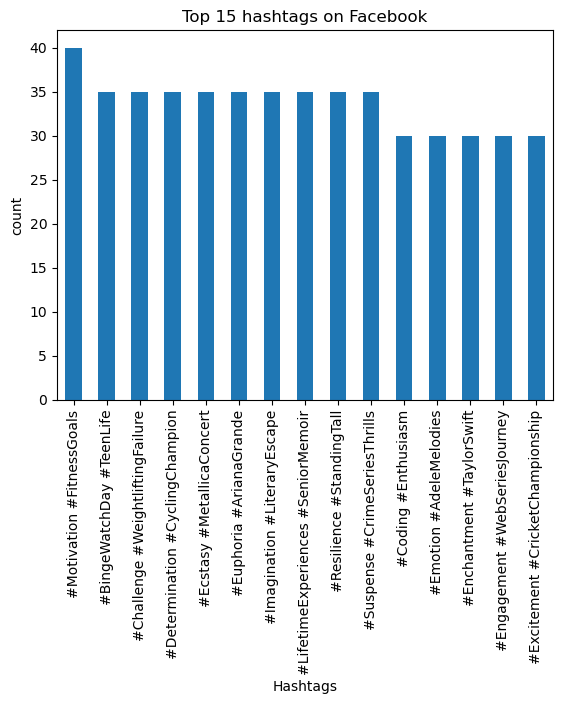

In [127]:
Facebook.groupby('Hashtags')['Retweets'].max().nlargest(15).sort_values(ascending=False).plot(kind='bar')
plt.title('Top 15 hashtags on Facebook')
plt.xlabel('Hashtags')
plt.ylabel('count')
plt.show()

## Top Facebook Accounts Liked by User

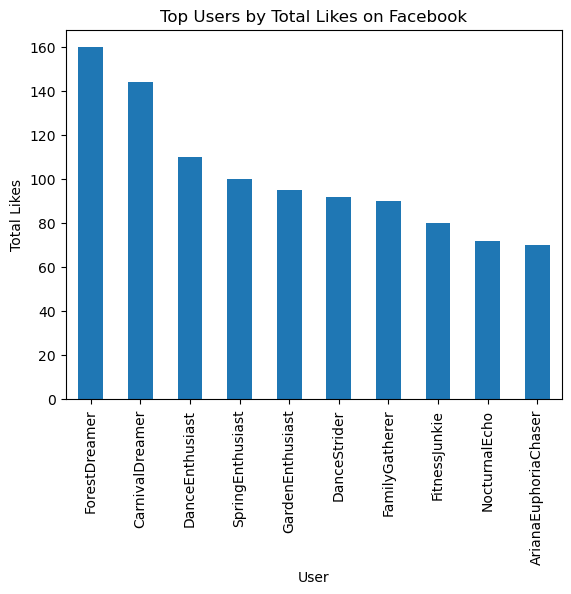

In [129]:
Facebook.groupby("User")["Likes"].sum().nlargest(10).plot(kind = "bar")
plt.title('Top Users by Total Likes on Facebook')
plt.xlabel('User')
plt.ylabel('Total Likes')
plt.show()

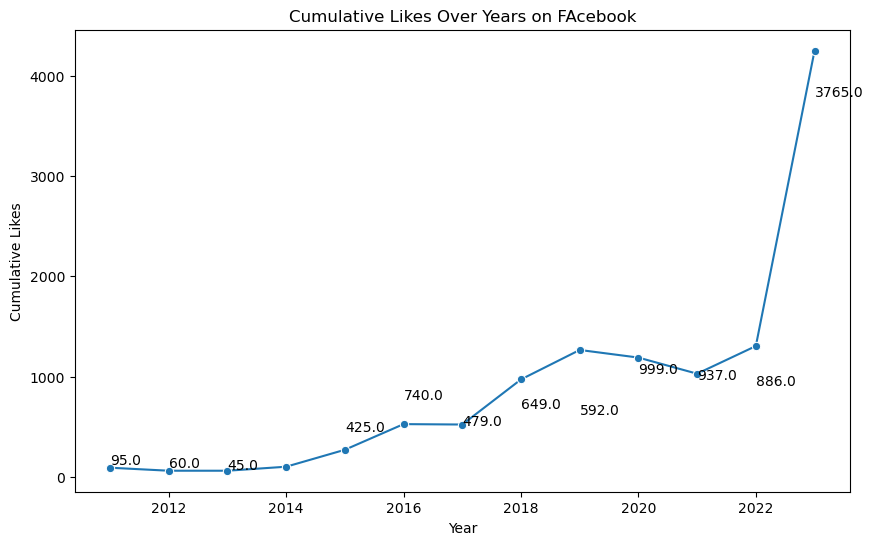

In [132]:
fb = Facebook.groupby("Year")["Likes"].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(data=insta, x="Year", y="Likes", marker="o")

for index, value in fb.iterrows():
    plt.text(value["Year"], value["Likes"], str(value["Likes"]), ha="left", va="bottom")

plt.title("Cumulative Likes Over Years on FAcebook")
plt.xlabel("Year")
plt.ylabel("Cumulative Likes")

plt.show()

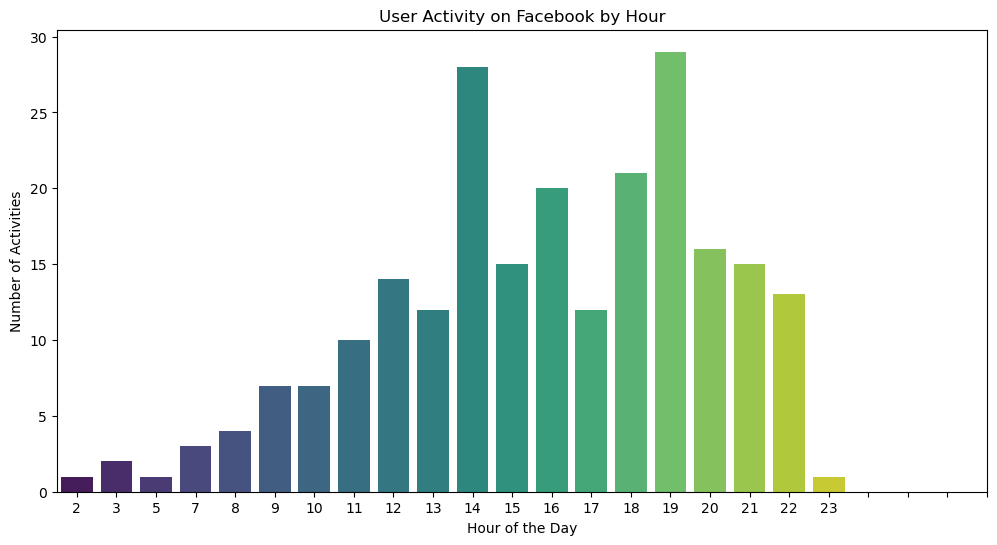

In [131]:
activity_by_hour = Facebook.groupby("Hour").size().reset_index(name='Activity')

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=activity_by_hour, x="Hour", y="Activity", palette="viridis")

plt.title("User Activity on Facebook by Hour")
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Activities")
plt.xticks(range(0, 24)) 

plt.show()

## Twitter

### Top 10 Tweets

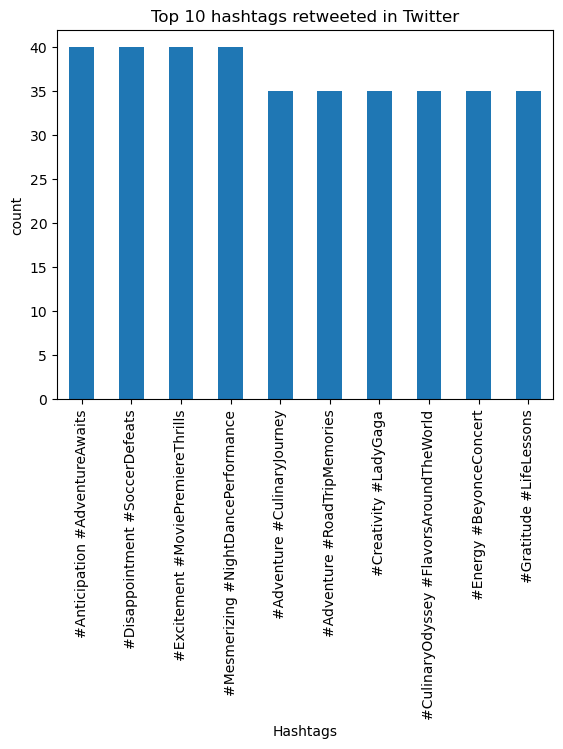

In [135]:
Twitter.groupby('Hashtags')['Retweets'].max().nlargest(10).sort_values(ascending=False).plot(kind="bar")
plt.title('Top 10 hashtags retweeted in Twitter')
plt.xlabel('Hashtags')
plt.ylabel('count')
plt.show()

### Top Twitter Accounts Liked by User

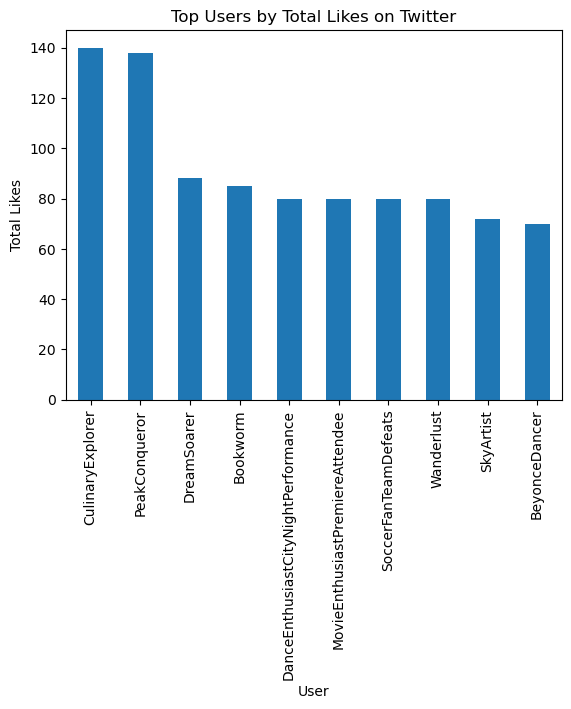

In [136]:
Twitter.groupby("User")["Likes"].sum().nlargest(10).plot(kind = "bar")
plt.title('Top Users by Total Likes on Twitter')
plt.xlabel('User')
plt.ylabel('Total Likes')
plt.show()

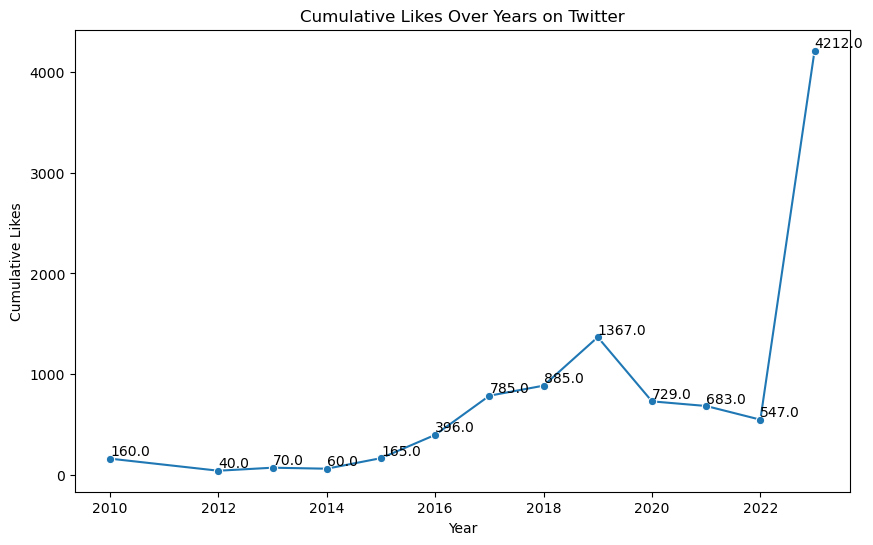

In [137]:
f = Twitter.groupby('Year')['Likes'].sum().reset_index()
plt.figure(figsize=(10, 6))
sns.lineplot(data=f, x='Year', y='Likes', marker='o')
for index, value in f.iterrows():
    plt.text(value['Year'], value['Likes'], str(value['Likes']), ha='left', va='bottom')

plt.title('Cumulative Likes Over Years on Twitter')
plt.xlabel('Year')
plt.ylabel('Cumulative Likes')

plt.show()

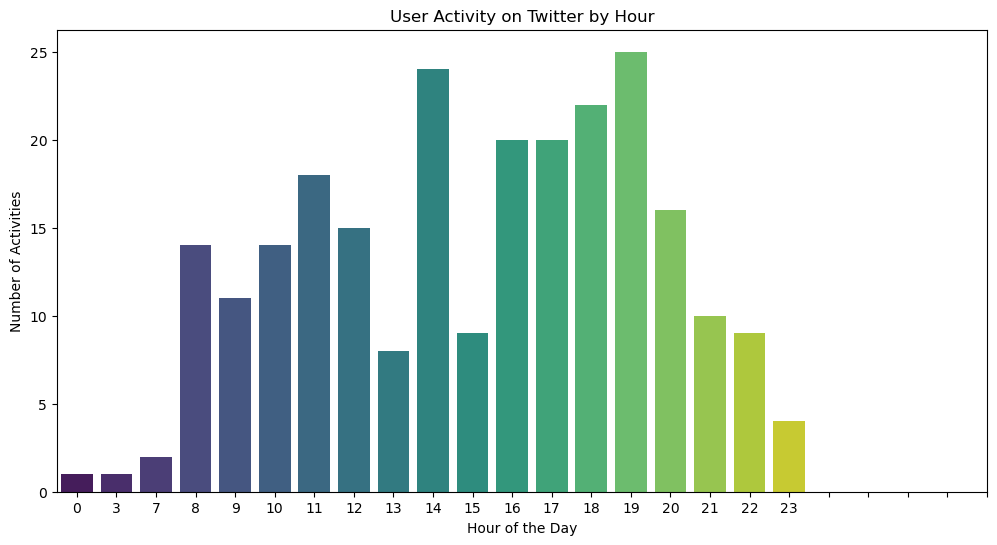

In [138]:
activity_by_hour = Twitter.groupby("Hour").size().reset_index(name='Activity')

plt.figure(figsize=(12, 6))
sns.barplot(data=activity_by_hour, x="Hour", y="Activity", palette="viridis")

plt.title("User Activity on Twitter by Hour")
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Activities")
plt.xticks(range(0, 24))  

plt.show()

# Findings
## Initial EDA revealed the distribution of sentiments across different platforms - Instagram is the most liked platform by the users.
## The most popular sentiments expressed were positive emotions such as joy and excitement.
## USA is the top country which contributes maximum to these social media followed by UK and Canada.
## January and February are the top months with maximum engagements.

# Platform-Specific Analysis

## Twitter
### Most Popular Accounts: Analysis of accounts with the highest number of followers and engagement is Culinary Explorer on Twitter.
### Most Common Time of Usage: Identification of peak activity hours for Twitter users i.e. 7PM and 2PM .
### Most Common Hashtags: Analysis of frequently used hashtags and their associated sentiments is related to Anticipation.
### Cumulative Likes Over Years: Visualization of the growth in likes over the years on Twitter had a bump in 2019 and then slowed down and then rose up in 2022.
### Most Popular Sentiment: The most popular sentiments expressed were positive emotions such as joy and excitement.

## Facebook
### Most Popular Accounts: Examination of accounts with the highest number of likes and shares are FOrest Dreamer and Carnival Dreamer .
### Most Common Time of Usage: Identification of peak activity hours for Facebook users i.e. 7PM and 2PM.
### Most Common Hashtags: Analysis of popular hashtags and their associated sentiments are Motivation and Fitness Goals.
### Cumulative Likes Over Years: Visualization of the growth in likes over the years on Facebook, we can see the growth in 2022 .

## Instagram
### Most Popular Accounts: Analysis of accounts with the highest number of followers and engagement is with Cosmos.
### Most Common Time of Usage: Identification of peak activity hours for Instagram users i.e. 2PM.
### Most Common Hashtags: Analysis of frequently used hashtags and their associated sentiments with despair.
### Cumulative Likes Over Years: Visualization of the growth in likes over the years on Instagram grew in 2019 and then in 2022.

# SUGGESTION :

## Enhance User Engagement
### Identify and promote content during peak activity hours to maximize engagement.
### Leverage popular hashtags to increase the visibility of posts and improve user interaction.

## Sentiment-Based Content Strategy
### Develop content strategies based on the prevailing sentiments on each platform to align with user preferences.
### Address negative sentiments promptly to mitigate potential brand damage and improve user satisfaction.

## Platform-Specific Campaigns
### Tailor marketing campaigns and content to the unique user behaviors and preferences of each platform.
### Focus on the most popular accounts and influencers to amplify the reach and impact of marketing efforts.

## Continuous Monitoring and Analysis
### Implement continuous monitoring of social media sentiments to stay updated with changing user opinions and trends.
### Use advanced analytical techniques to gain deeper insights and improve the effectiveness of social media strategies.

# Conclusion
## This project provides a comprehensive analysis of social media sentiments on Twitter, Facebook, and Instagram. By understanding user behavior, engagement patterns, and sentiment trends, businesses and individuals can develop more effective social media strategies to enhance their online presence and connect with their audience more meaningfully. The findings and suggestions outlined in this project serve as a valuable resource for leveraging social media data to drive better decision-making and improve overall engagement.